In [101]:
import pandas as pd
import numpy as np

qc_stats = pd.read_csv('../Results/Reports/multiqc_report_data/mqc_picard_deduplication_1.txt',
                      sep="\t", header=0, index_col=0)

mutations_filtered = pd.read_csv('../analysis/merged_variants_anno_vaf_filtered.txt', 
                                 sep="\t", header=0, index_col=0, low_memory=False)

mutations = pd.read_csv('../analysis/merged_variants_anno_vaf.txt',
                        sep="\t", header=0, index_col=0, low_memory=False)


metasamples = pd.read_excel('../Metadata.xlsx')

In [102]:
print(len(set(metasamples['PATIENT_ID'])))
print(len(set(metasamples['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['PATIENT_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'gDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID'])))

49
150
80
31
68
36
15
31


In [103]:
metasamples = metasamples[~metasamples['PATIENT_ID'].isin(['VHIO_XX1', 'VHIO_XX2', 
                                                           'VHIO_XX3', 'VHIO_XX4', 
                                                           'VHIO_XX5', 'VHIO_XX6',
                                                           'VHIO_XX7', 'VHIO_XX8',
                                                           'VHIO_20', 'VHIO_41', 
                                                           'VHIO_42', 'VHIO_43', 
                                                           'VHIO_44', 'VHIO_46', 
                                                           'VHIO_48', 'VHIO_49', 
                                                           'VHIO_05', 'VHIO_21'])]
SAMPLES = [x.strip() for x in metasamples['SAMPLE_ID'] + '-' + metasamples['PATIENT_ID']]
metasamples.index = SAMPLES

In [104]:
print(len(set(metasamples['PATIENT_ID'])))
print(len(set(metasamples['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['PATIENT_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'gDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID'])))

31
104
56
21
49
21
8
26


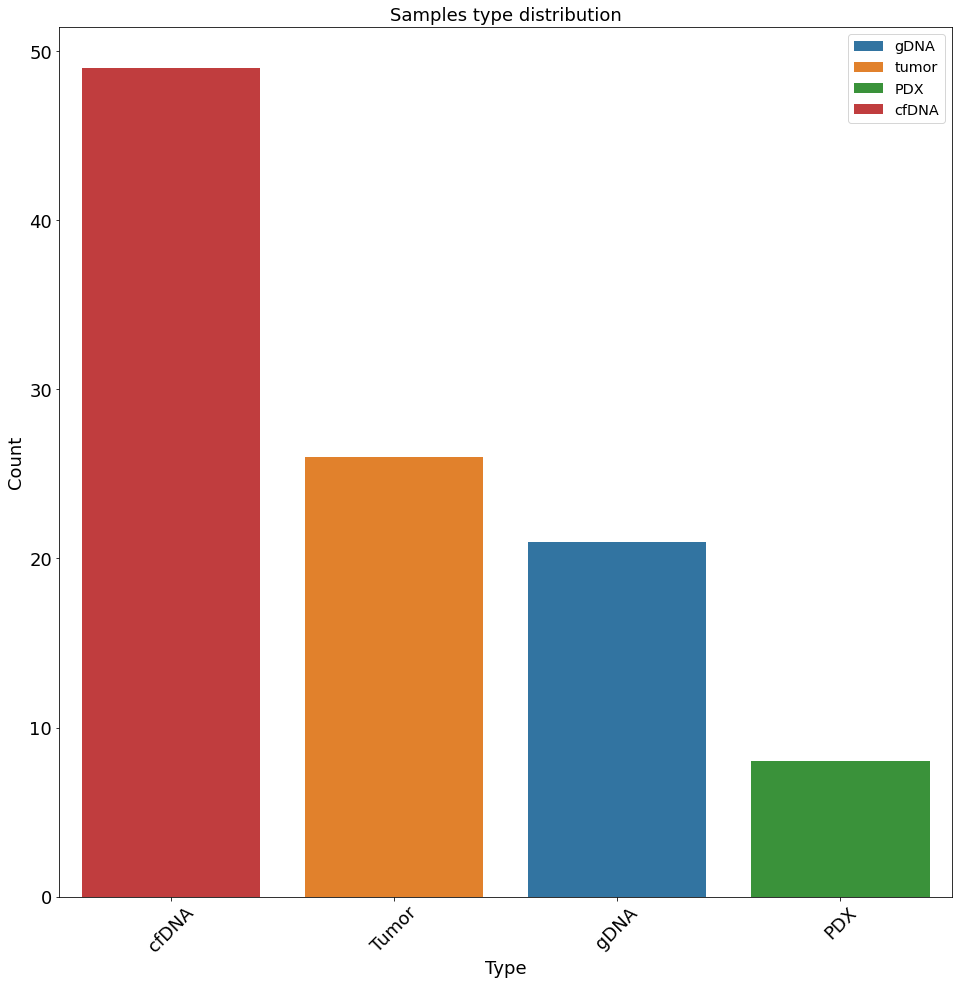

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='SAMPLE_TYPE', hue='SAMPLE_TYPE', dodge=False,
                       data=metasamples, hue_order=['gDNA', 'tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor', 'gDNA', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
_ = sns_plot.set_title('Samples type distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='30')
fig.savefig('samples_type_distribution_all.pdf', dpi=180)

In [106]:
metasamples = metasamples.loc[(metasamples['SAMPLE_TYPE'] != "gDNA"), :]
SAMPLES = metasamples.index.tolist()
mutations = mutations.loc[:, mutations.columns[0:10].to_list() + SAMPLES]

qc_stats = qc_stats.loc[metasamples['SAMPLE_ID'], :]
qc_stats['SAMPLE_ID'] = qc_stats.index
qc_stats.index = SAMPLES
qc_stats['type'] = metasamples['SAMPLE_TYPE'].to_numpy()
qc_stats['Unique Pairs'] = qc_stats['Unique Pairs'] / 1000000
qc_stats['VAR2'] = metasamples['VAR2'].to_numpy()
qc_stats['PATIENT_ID'] = metasamples['PATIENT_ID'].to_numpy()

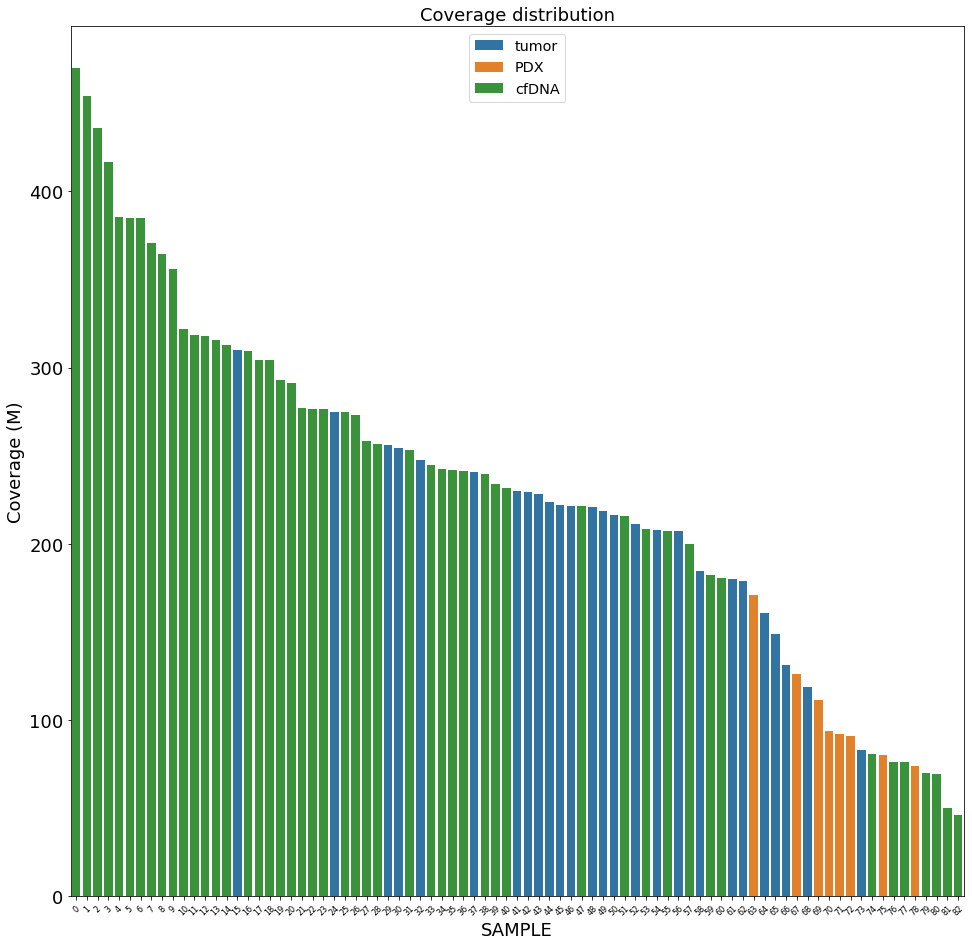

In [107]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.barplot(x='SAMPLE_ID', y='Unique Pairs', hue="type", dodge=False,
                       data=qc_stats, hue_order=['tumor', 'PDX', 'cfDNA'], 
                       order=qc_stats.sort_values('Unique Pairs', ascending = False).SAMPLE_ID, 
                       ax=ax)
_ = sns_plot.set_xticklabels(sns_plot.get_xticks(), size=8, rotation=45)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.tick_params(axis='y', which='major', labelsize=18)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution_all.pdf', dpi=180)

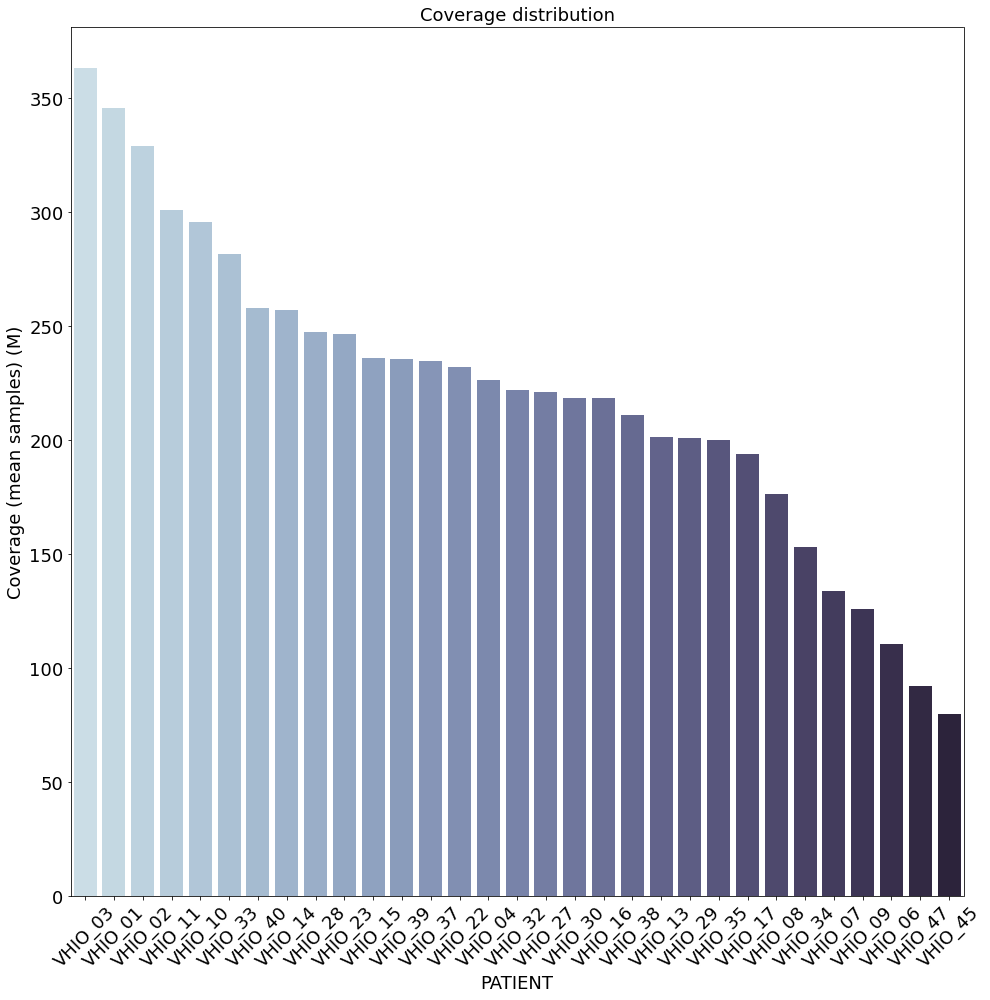

In [108]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = qc_stats.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index
sort_odrder = tmp.sort_values('Unique Pairs', ascending = False).index
sns_plot = sns.barplot(x='PATIENT_ID', y='Unique Pairs', dodge=False, data=tmp, 
                       order=sort_odrder, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(sort_odrder, size=16, rotation=45)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
fig.savefig('coverage_distribution_per_patient_al.pdf', dpi=180)

<ipython-input-109-7300a6b27e3f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


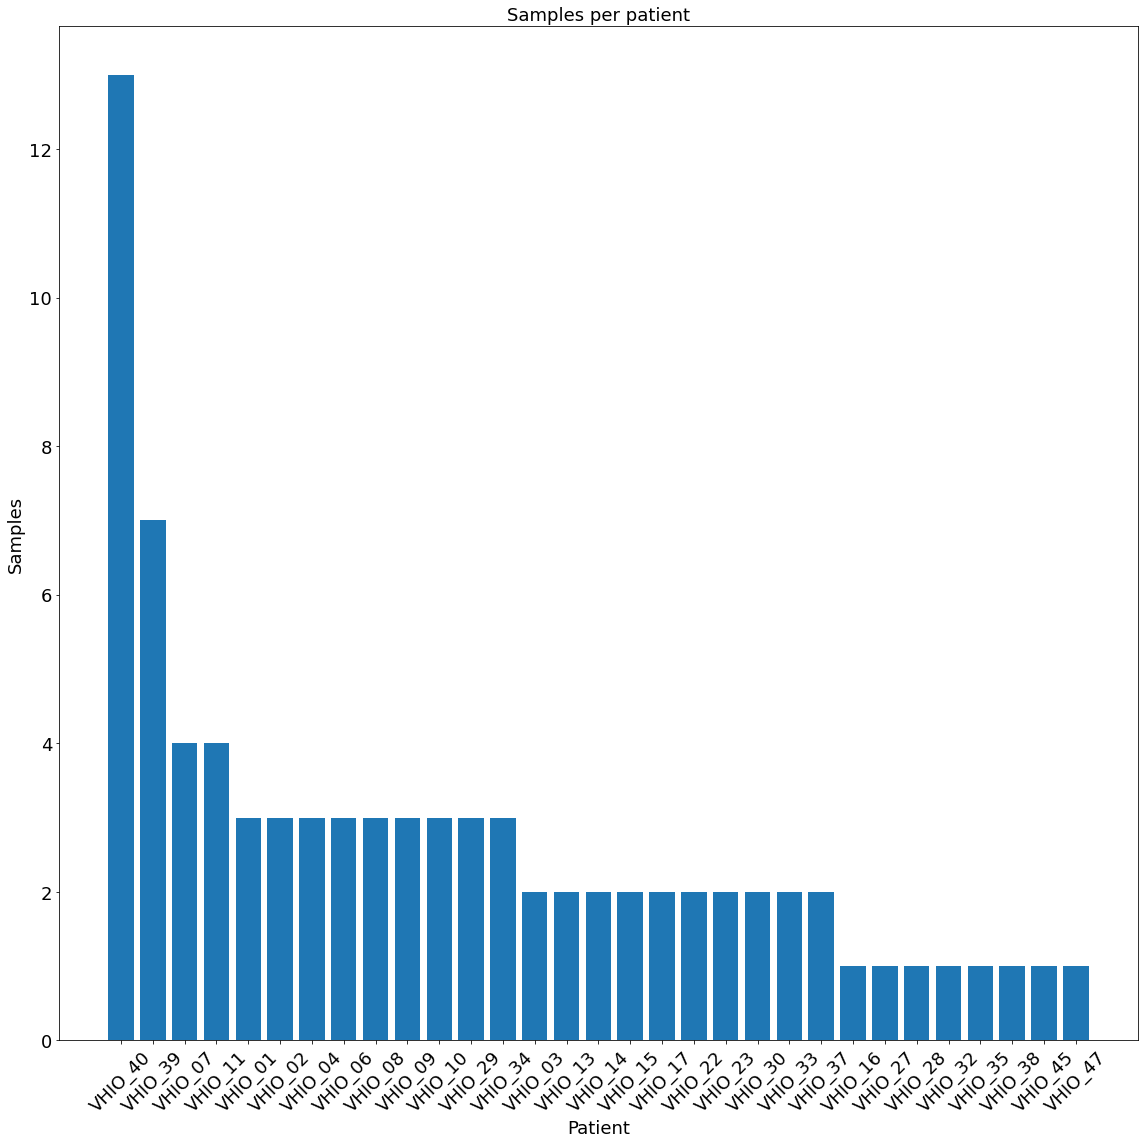

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sub = metasamples.loc[:, ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('samples_per_patient_all.pdf', dpi=180)

In [110]:
# Keep only samples that are tumor-normal pair and labeled as included
meta_filtered = metasamples.loc[(metasamples['INCLUDED'] == "Y")
                                & (metasamples['TUMOR_ONLY'] == "No")
                                & (metasamples['SAMPLE_TYPE'] != "gDNA"), :]
SAMPLES = meta_filtered.index.tolist()

mutations_filtered = mutations_filtered.loc[:, mutations_filtered.columns[0:10].to_list() + SAMPLES]

qc_stats = pd.read_csv('../Results/Reports/multiqc_report_data/mqc_picard_deduplication_1.txt',
                      sep="\t", header=0, index_col=0)

qc_stats = qc_stats.loc[meta_filtered['SAMPLE_ID'], :]
qc_stats['SAMPLE_ID'] = qc_stats.index
qc_stats.index = SAMPLES
qc_stats['type'] = meta_filtered['SAMPLE_TYPE'].to_numpy()
qc_stats['Unique Pairs'] = qc_stats['Unique Pairs'] / 1000000
qc_stats['VAR2'] = meta_filtered['VAR2'].to_numpy()
qc_stats['PATIENT_ID'] = meta_filtered['PATIENT_ID'].to_numpy()

In [111]:
print(len(set(meta_filtered['PATIENT_ID'])))
print(len(set(meta_filtered[meta_filtered['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID'])))
print(len(set(meta_filtered[meta_filtered['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID'])))
print(len(set(meta_filtered[meta_filtered['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID'])))

16
13
4
11


In [112]:
print(len(set(meta_filtered[meta_filtered['VAR2'] == 'E']['PATIENT_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'E') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'cfDNA')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'E') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'PDX')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'E') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'tumor')]['SAMPLE_ID'])))

10
5
4
6


In [113]:
print(len(set(meta_filtered[meta_filtered['VAR2'] == 'F']['PATIENT_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'F') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'cfDNA')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'F') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'PDX')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'F') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'tumor')]['SAMPLE_ID'])))

8
8
0
5


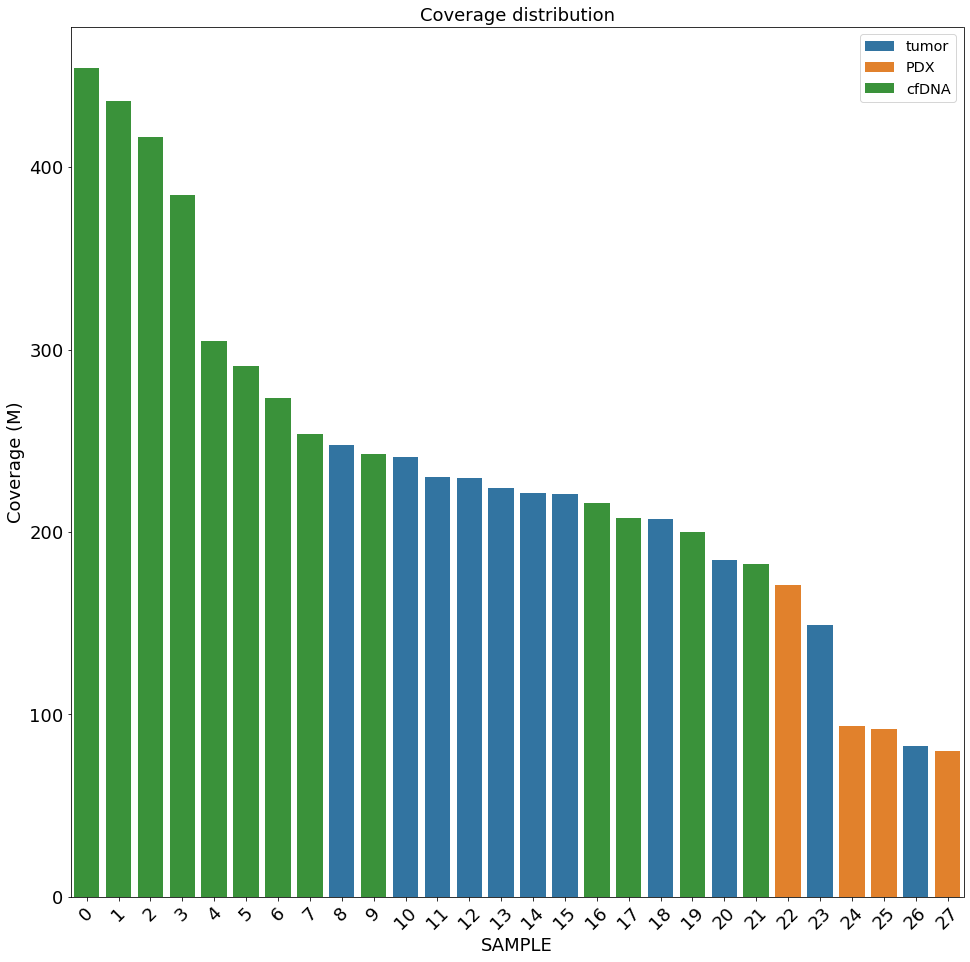

In [114]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.barplot(x='SAMPLE_ID', y='Unique Pairs', hue="type", dodge=False,
                       data=qc_stats, hue_order=['tumor', 'PDX', 'cfDNA'], 
                       order=qc_stats.sort_values('Unique Pairs', ascending = False).SAMPLE_ID, 
                       ax=ax)
_ = sns_plot.set_xticklabels(sns_plot.get_xticks(), size=16, rotation=45)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution.pdf', dpi=180)

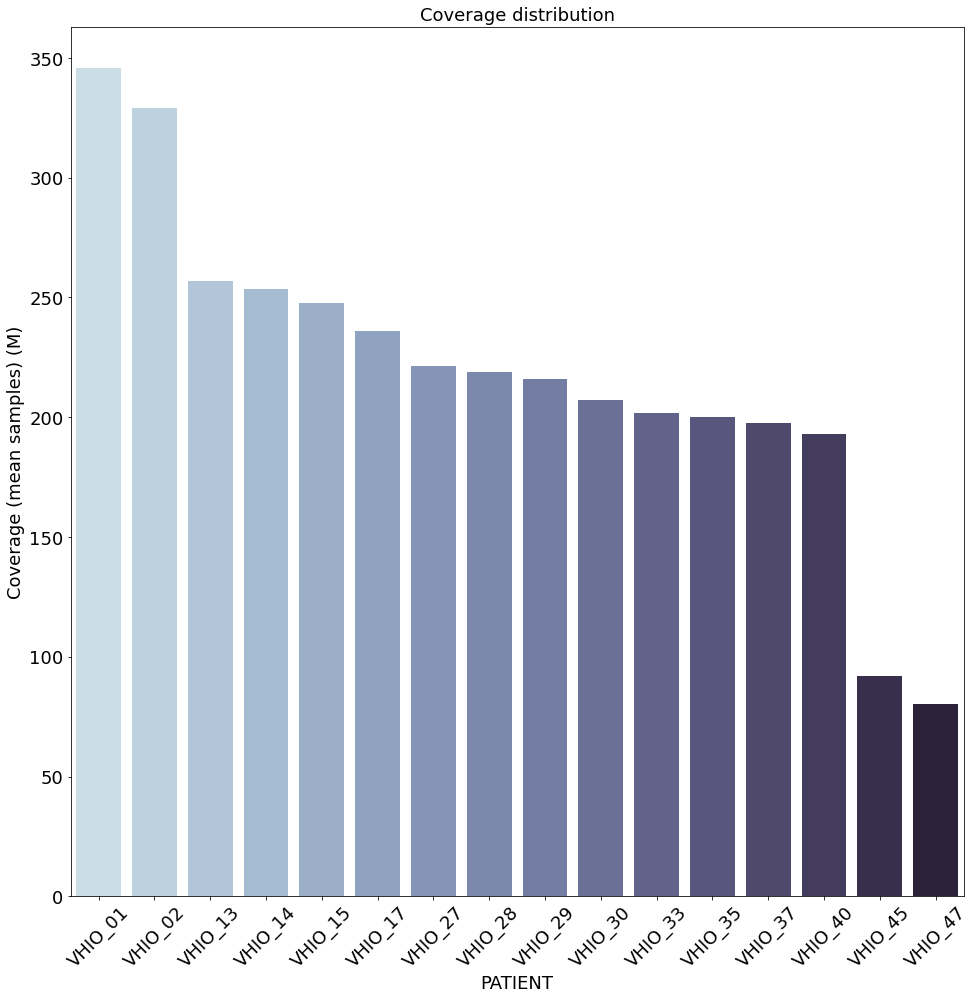

In [115]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = qc_stats.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index

sns_plot = sns.barplot(x='PATIENT_ID', y='Unique Pairs', dodge=False, data=tmp, 
                       order=tmp.sort_values('Unique Pairs', ascending = False).index, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(tmp.index, size=16, rotation=45)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
fig.savefig('coverage_distribution_per_patient.pdf', dpi=180)

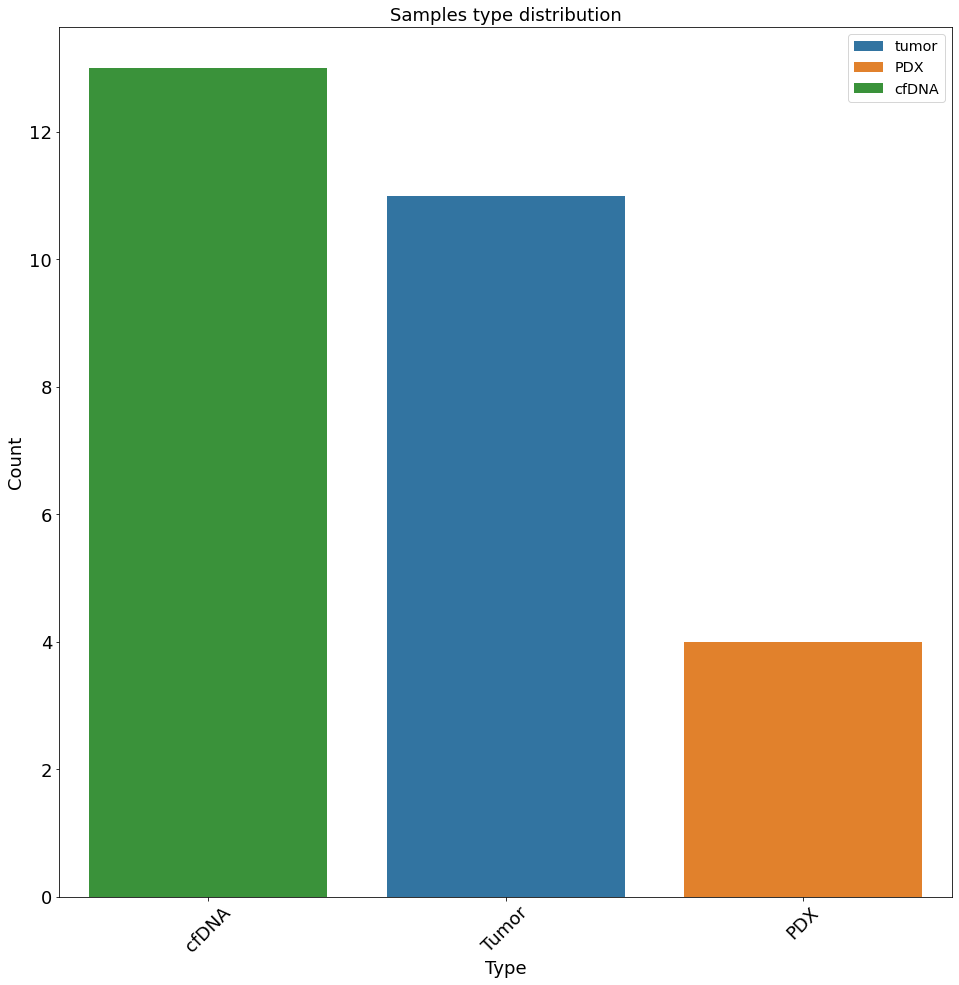

In [116]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='type', hue='type', dodge=False,
                       data=qc_stats, hue_order=['tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution.pdf', dpi=180)

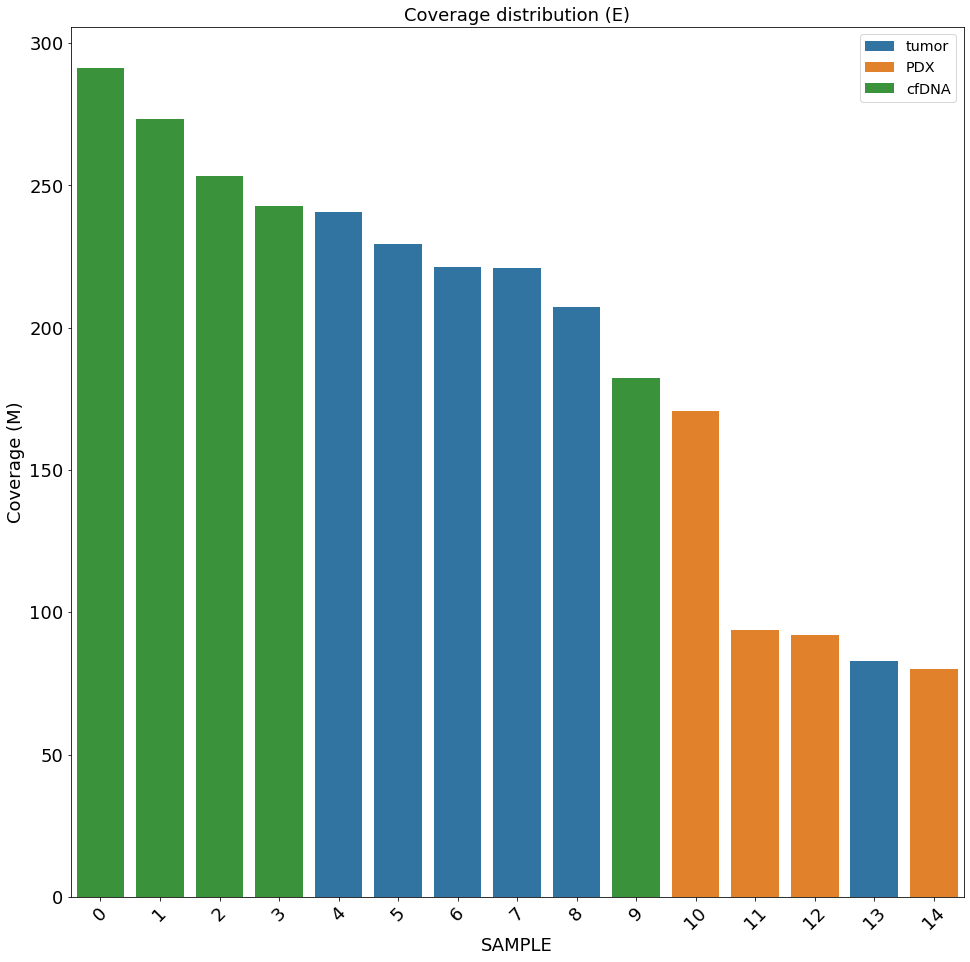

In [117]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.barplot(x='SAMPLE_ID', y='Unique Pairs', hue="type", dodge=False,
                       data=qc_stats[qc_stats['VAR2'] == 'E'], 
                       hue_order=['tumor', 'PDX', 'cfDNA'],
                       order=qc_stats[qc_stats['VAR2'] == 'E'].sort_values('Unique Pairs', ascending = False).SAMPLE_ID, 
                       ax=ax)
_ = sns_plot.set_xticklabels(sns_plot.get_xticks(), size=16, rotation=45)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (E)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution_E.pdf', dpi=180)

No handles with labels found to put in legend.


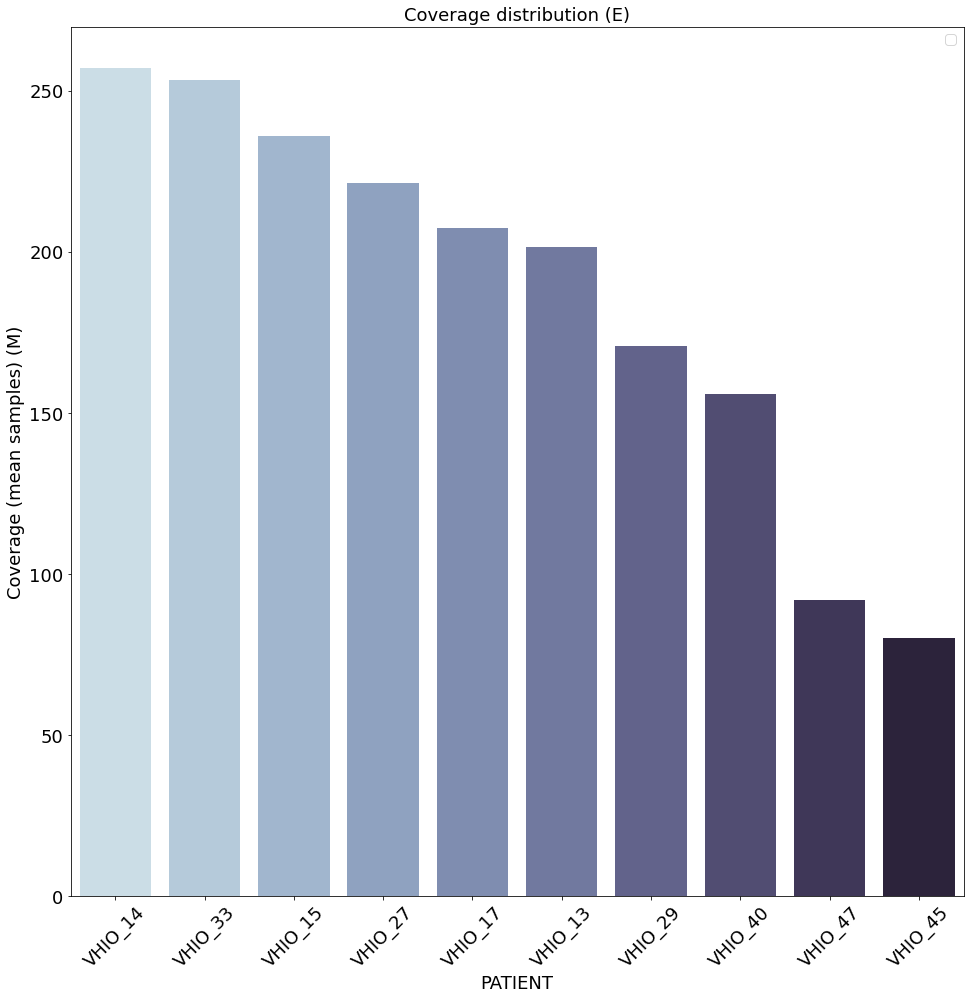

In [118]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = qc_stats[qc_stats['VAR2'] == 'E']
tmp = tmp.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index
sort_order = tmp.sort_values('Unique Pairs', ascending = False).index

sns_plot = sns.barplot(x='PATIENT_ID', y='Unique Pairs', dodge=False, data=tmp, 
                       order=sort_order, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(sort_order, size=16, rotation=45)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (E)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution_per_patient_E.pdf', dpi=180)

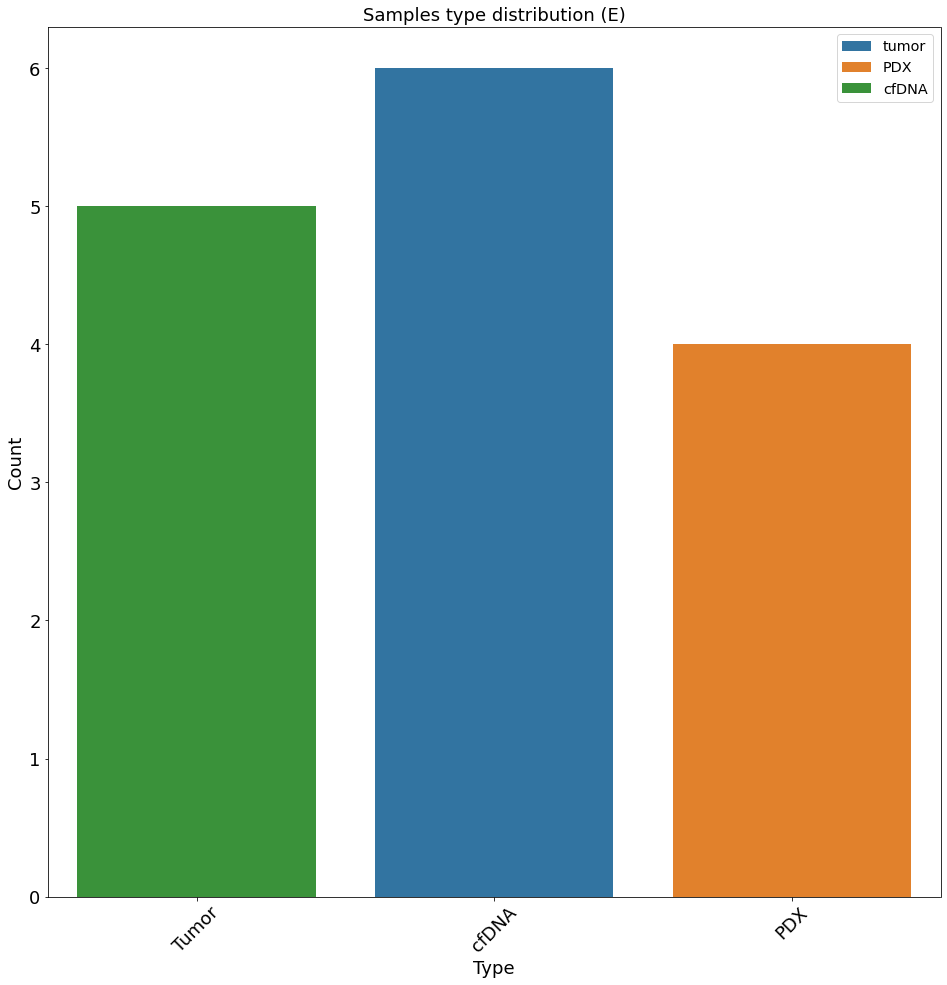

In [119]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='type', hue='type', dodge=False,
                         data=qc_stats[qc_stats['VAR2'] == 'E'], 
                         hue_order=['tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['Tumor', 'cfDNA', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution (E)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution_E.pdf', dpi=180)

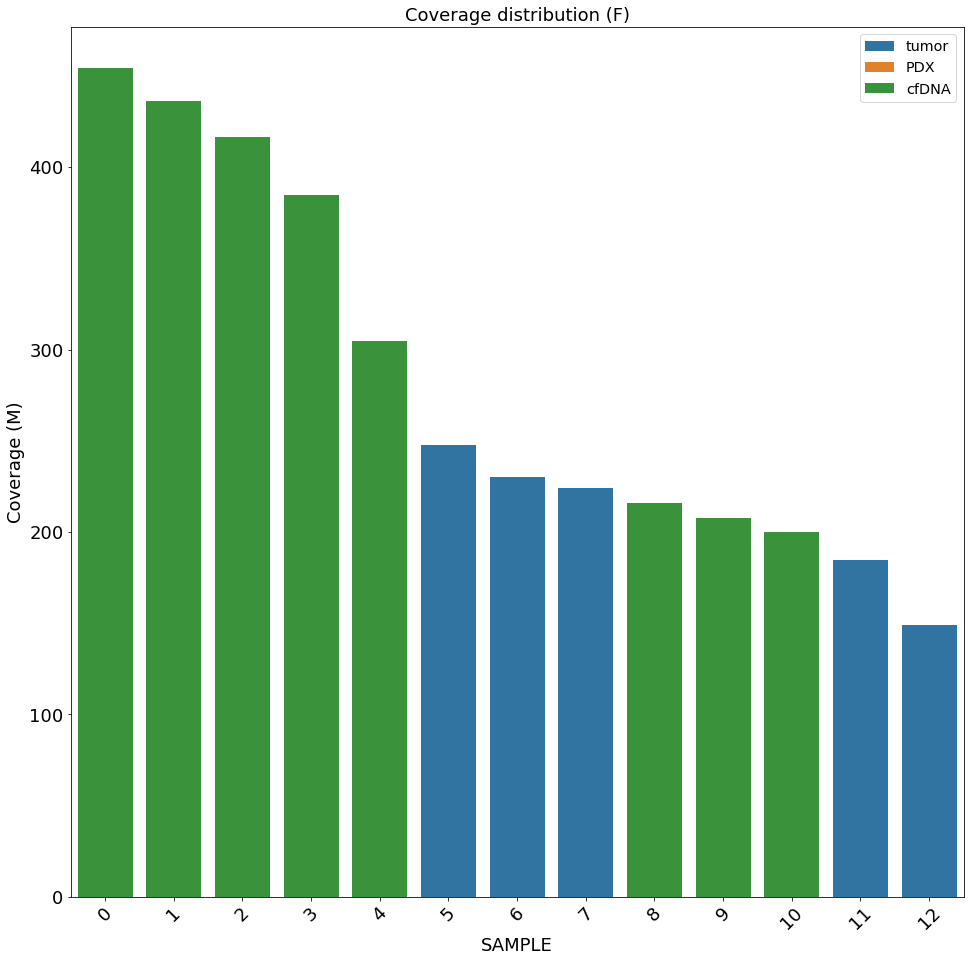

In [120]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.barplot(x='SAMPLE_ID', y='Unique Pairs', hue="type", dodge=False,
                       data=qc_stats[qc_stats['VAR2'] == 'F'], 
                       hue_order=['tumor', 'PDX', 'cfDNA'],
                       order=qc_stats[qc_stats['VAR2'] == 'F'].sort_values('Unique Pairs', ascending = False).SAMPLE_ID, 
                       ax=ax)
_ = sns_plot.set_xticklabels(sns_plot.get_xticks(), size=16, rotation=45)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (F)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution_F.pdf', dpi=180)

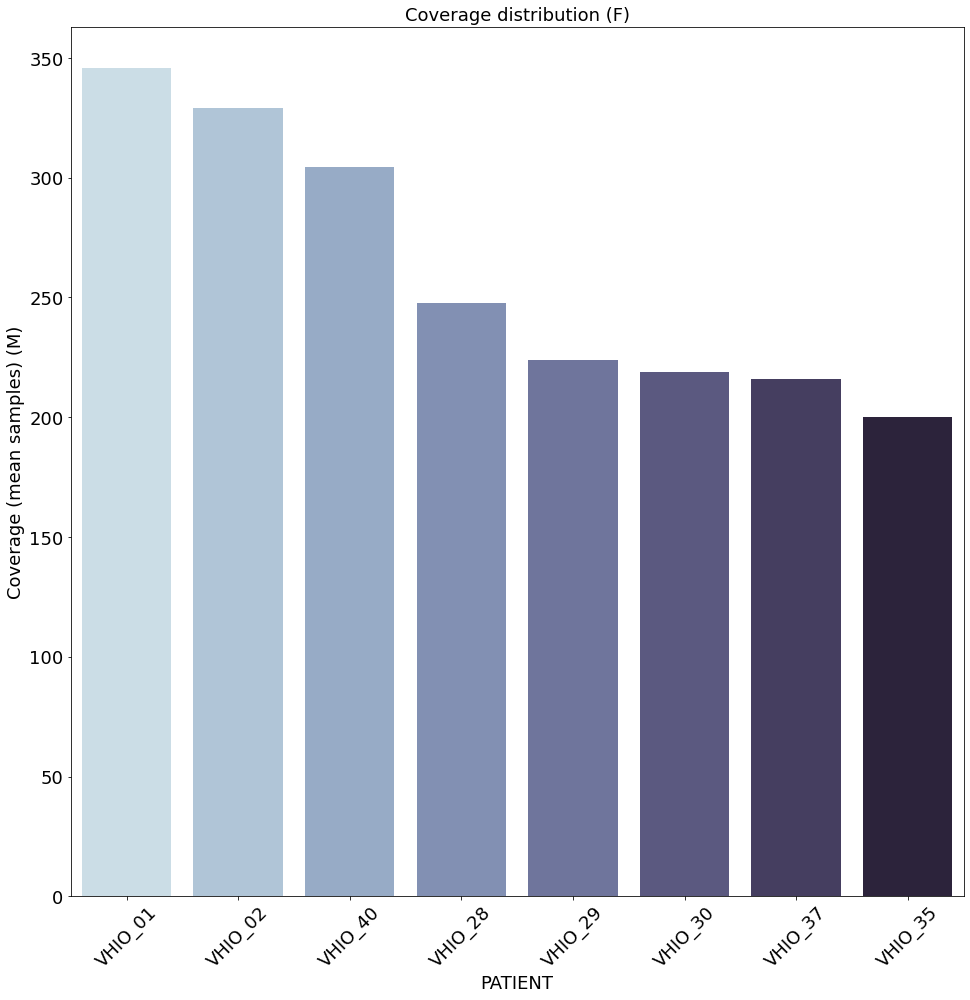

In [121]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = qc_stats[qc_stats['VAR2'] == 'F']
tmp = tmp.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index
sort_order = tmp.sort_values('Unique Pairs', ascending = False).index

sns_plot = sns.barplot(x='PATIENT_ID', y='Unique Pairs', dodge=False, data=tmp, 
                       order=sort_order, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(sort_order, size=16, rotation=45)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (F)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
fig.savefig('coverage_distribution_per_patient_F.pdf', dpi=180)

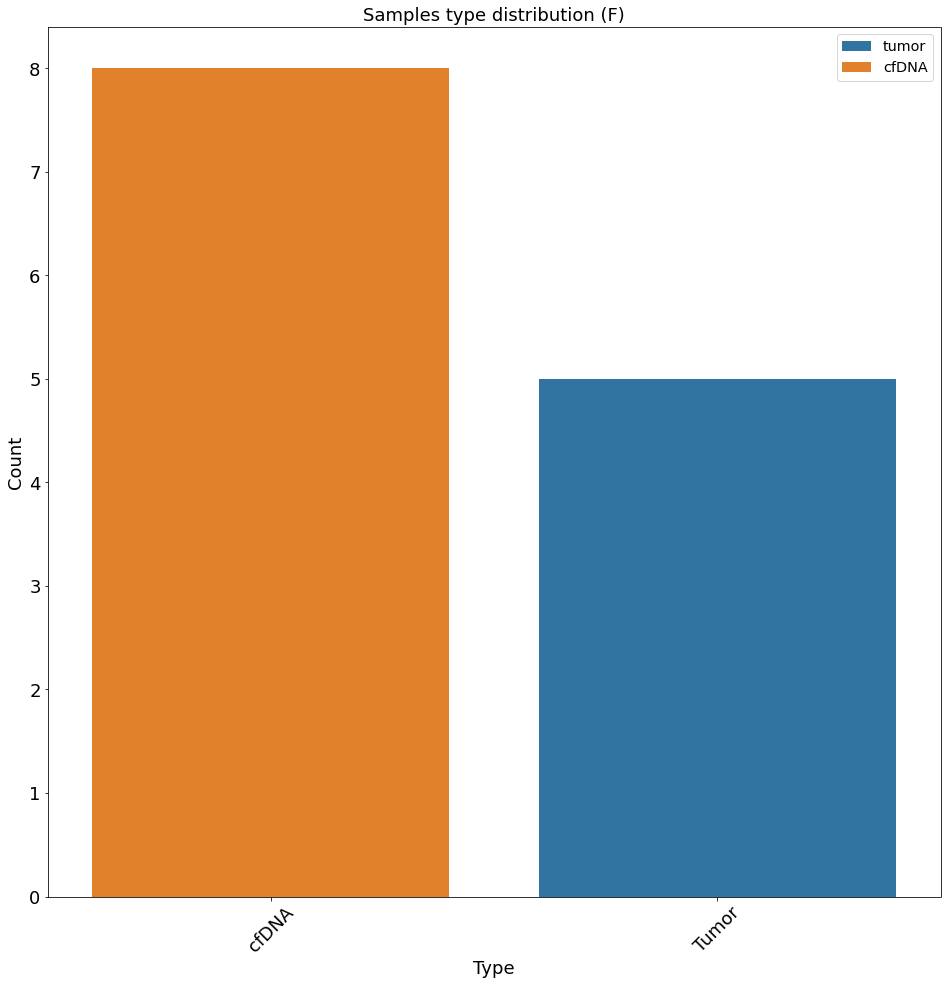

In [122]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='type', hue='type', dodge=False,
                         data=qc_stats[qc_stats['VAR2'] == 'F'], 
                         hue_order=['tumor', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution (F)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution_F.pdf', dpi=180)

<ipython-input-123-4bbbcf86b29e>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


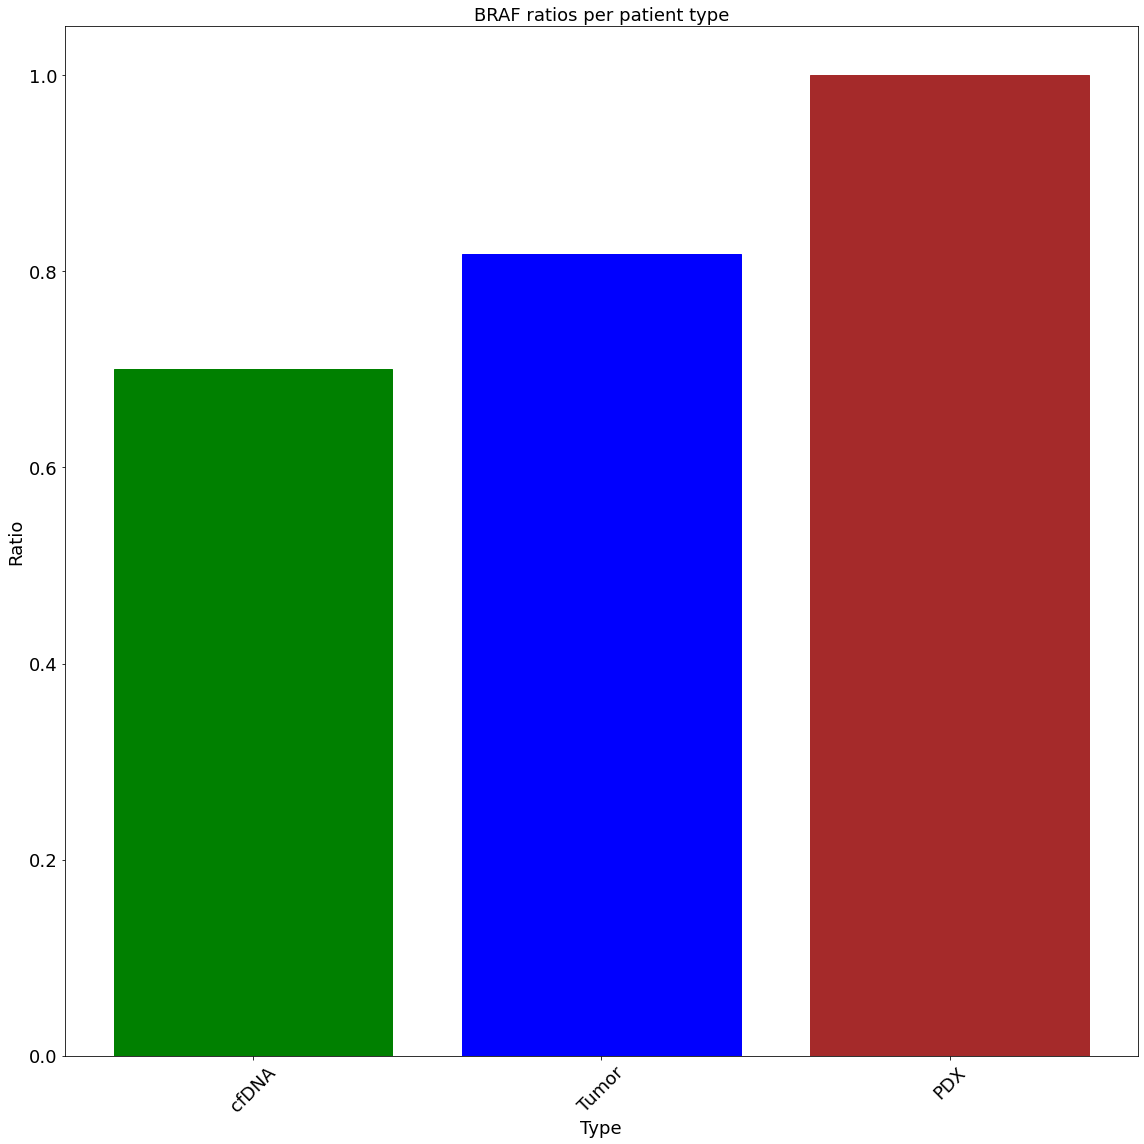

In [123]:
total_pdx = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'PDX'), 'PATIENT_ID']))
total_cfdna = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'cfDNA'), 'PATIENT_ID']))
total_tumor = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'tumor'), 'PATIENT_ID']))

ratios_braf = list()

SAMPLES = meta_filtered.index.tolist()
mut_braf = mutations.loc[mutations['GENE'] == 'BRAF', mutations.columns[0:10].to_list() + SAMPLES]
for index,row in mut_braf.iterrows():
    if 'p.Val600Glu' in row['AACHANGE']:
        braf_mutations_cfDNA = set()
        braf_mutations_tumor = set()
        braf_mutations_PDX = set()
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = meta_filtered.loc[c, 'SAMPLE_TYPE']
                patient = c.split('-')[-1]
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA.add(patient)
                elif 'tumor' in sample_type:
                    braf_mutations_tumor.add(patient)
                elif 'PDX' in sample_type:
                    braf_mutations_PDX.add(patient)
                else:
                    print(c)
        ratios_braf.append((len(braf_mutations_cfDNA) / total_cfdna,
                            len(braf_mutations_tumor) / total_tumor,
                            len(braf_mutations_PDX) / total_pdx))
  
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per patient type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('braf_ratios_patients.pdf', dpi=180)

<ipython-input-132-631e3e127476>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


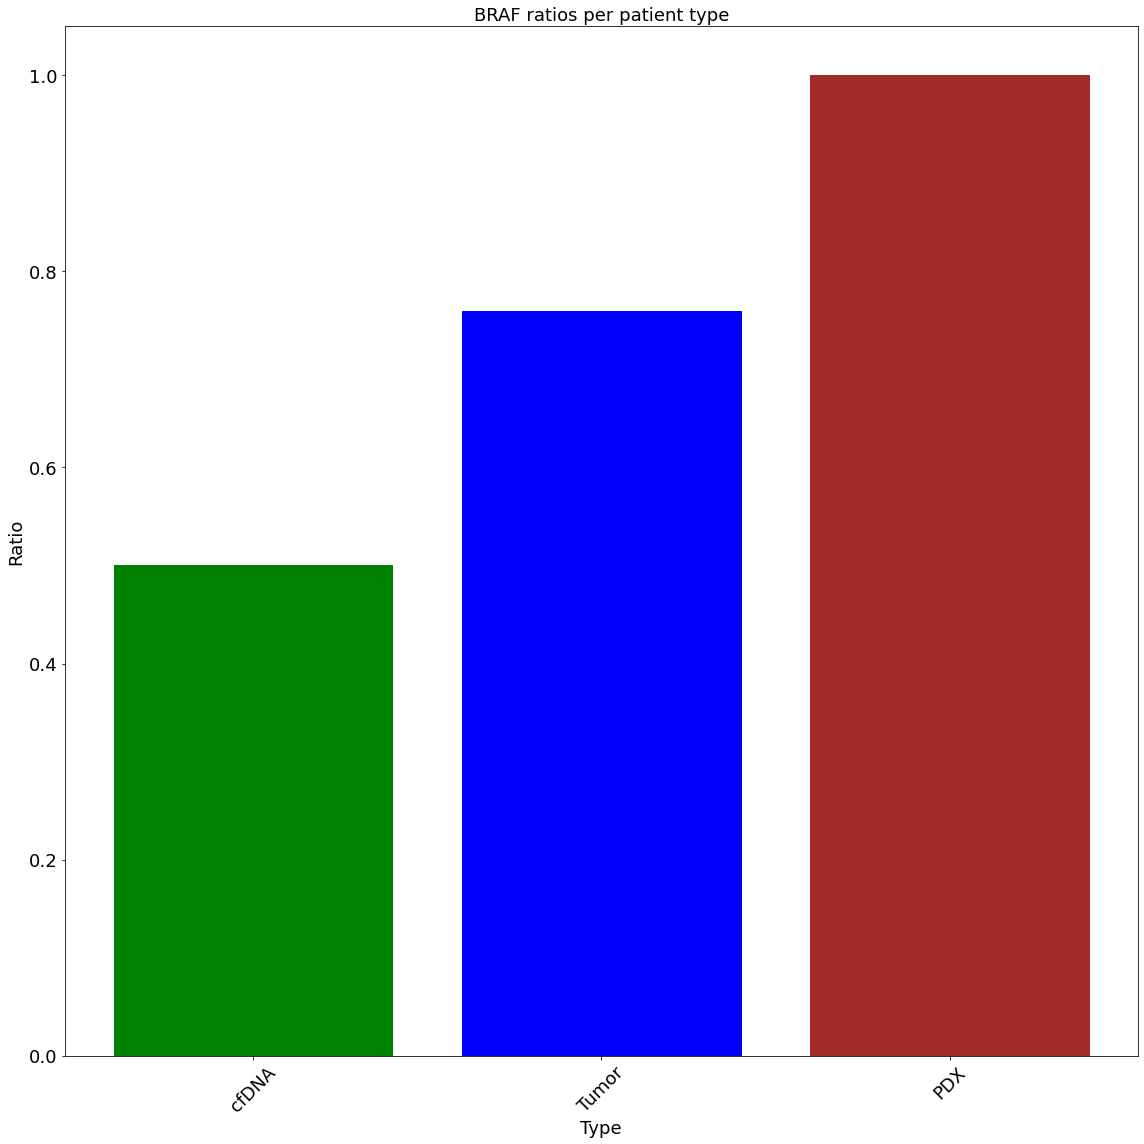

In [132]:
total_pdx = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'PDX') , 'PATIENT_ID']))
total_cfdna = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'cfDNA'), 'PATIENT_ID']))
total_tumor = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'tumor'), 'PATIENT_ID']))

ratios_braf = list()

mut_braf = mutations[mutations['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if 'p.Val600Glu' in row['AACHANGE']:
        braf_mutations_cfDNA = set()
        braf_mutations_tumor = set()
        braf_mutations_PDX = set()
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = metasamples.loc[c, 'SAMPLE_TYPE']
                patient = c.split('-')[-1]
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA.add(patient)
                elif 'tumor' in sample_type:
                    braf_mutations_tumor.add(patient)
                elif 'PDX' in sample_type:
                    braf_mutations_PDX.add(patient)
                else:
                    print(c)
        ratios_braf.append((len(braf_mutations_cfDNA) / total_cfdna,
                            len(braf_mutations_tumor) / total_tumor,
                            len(braf_mutations_PDX) / total_pdx))
        
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per patient type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('braf_ratios_patients_unfilered.pdf', dpi=180)


<ipython-input-125-96f510f6b3fd>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


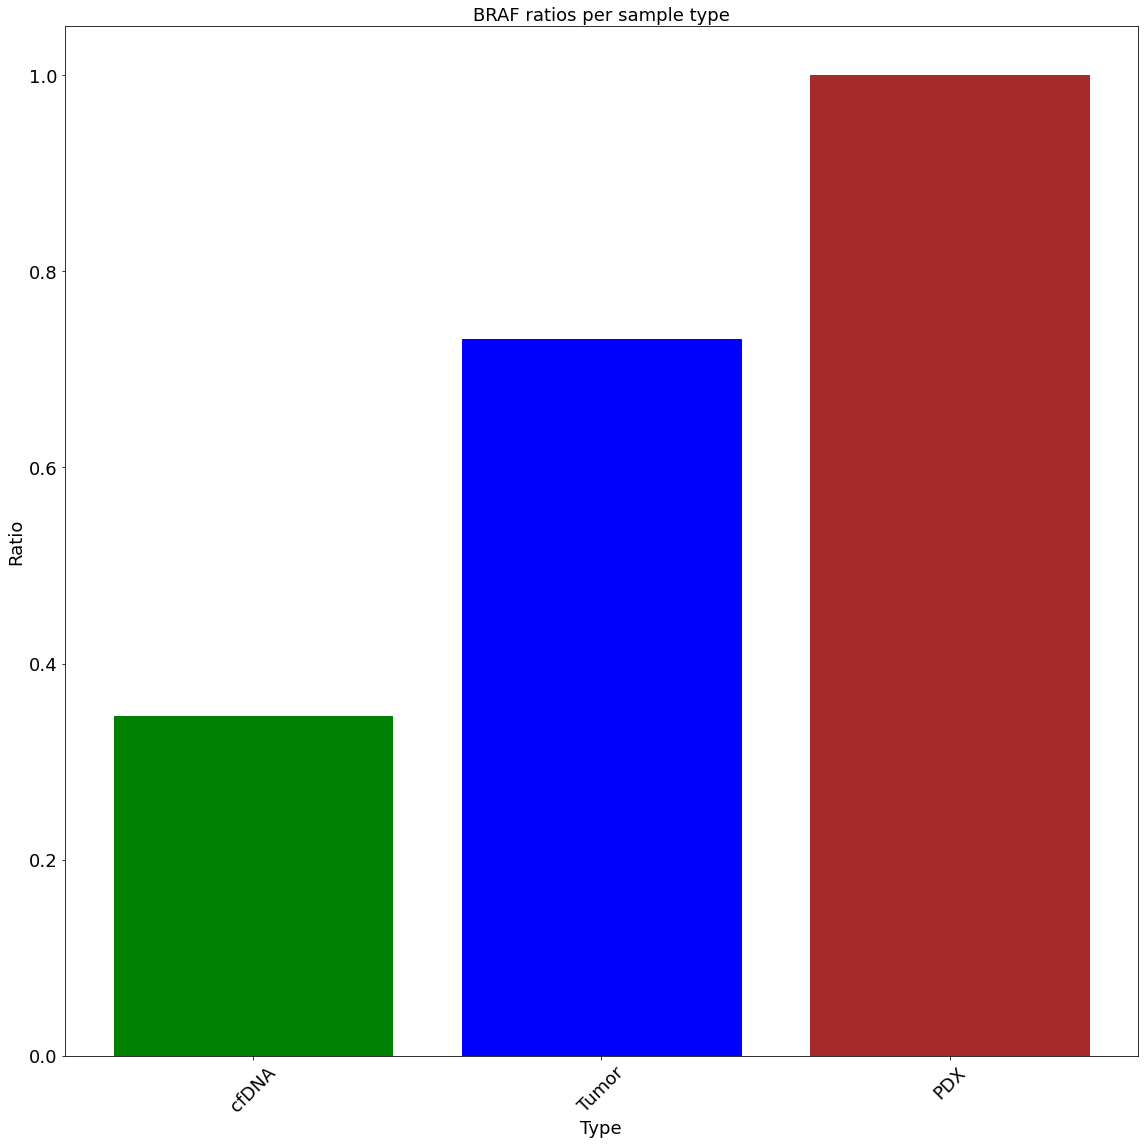

In [125]:
total_pdx = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'PDX'), 'SAMPLE_ID']))
total_cfdna = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'cfDNA'), 'SAMPLE_ID']))
total_tumor = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'tumor'), 'SAMPLE_ID']))

ratios_braf = list()

mut_braf = mutations.loc[mutations['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if 'p.Val600Glu' in row['AACHANGE']:
        braf_mutations_cfDNA = 0
        braf_mutations_tumor = 0
        braf_mutations_PDX = 0
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = metasamples.loc[c, 'SAMPLE_TYPE']
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA += 1
                elif 'tumor' in sample_type:
                    braf_mutations_tumor += 1
                elif 'PDX' in sample_type:
                    braf_mutations_PDX += 1
                else:
                    print(c)      
        ratios_braf.append((braf_mutations_cfDNA / total_cfdna,
                            braf_mutations_tumor / total_tumor,
                            braf_mutations_PDX / total_pdx))
        
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per sample type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('braf_ratios_unfiltered.pdf', dpi=180)

<ipython-input-126-6a90257d0dd6>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


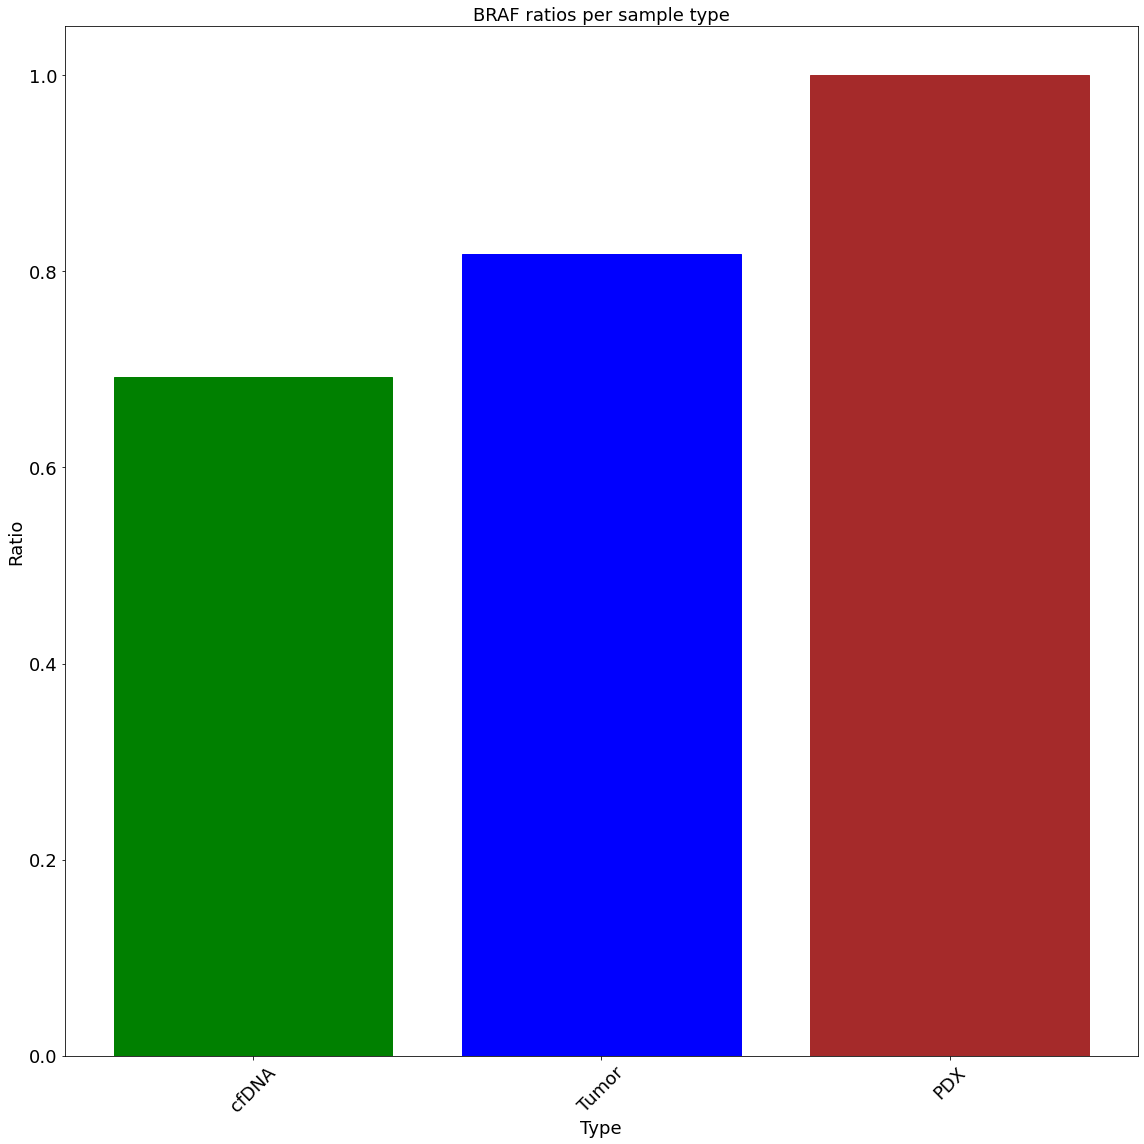

In [126]:
total_pdx = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'PDX'), 'SAMPLE_ID']))
total_cfdna = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'cfDNA'), 'SAMPLE_ID']))
total_tumor = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'tumor'), 'SAMPLE_ID']))

ratios_braf = list()

mut_braf = mutations_filtered[mutations_filtered['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if 'p.Val600Glu' in row['AACHANGE']:
        braf_mutations_cfDNA = 0
        braf_mutations_tumor = 0
        braf_mutations_PDX = 0
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = meta_filtered.loc[c, 'SAMPLE_TYPE']
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA += 1
                elif 'tumor' in sample_type:
                    braf_mutations_tumor += 1
                elif 'PDX' in sample_type:
                    braf_mutations_PDX += 1
                else:
                    print(c)
                    
        ratios_braf.append((braf_mutations_cfDNA / total_cfdna,
                            braf_mutations_tumor / total_tumor,
                            braf_mutations_PDX / total_pdx))
        
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per sample type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('braf_ratios.pdf', dpi=180)

<ipython-input-127-7ed12bbe20c7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


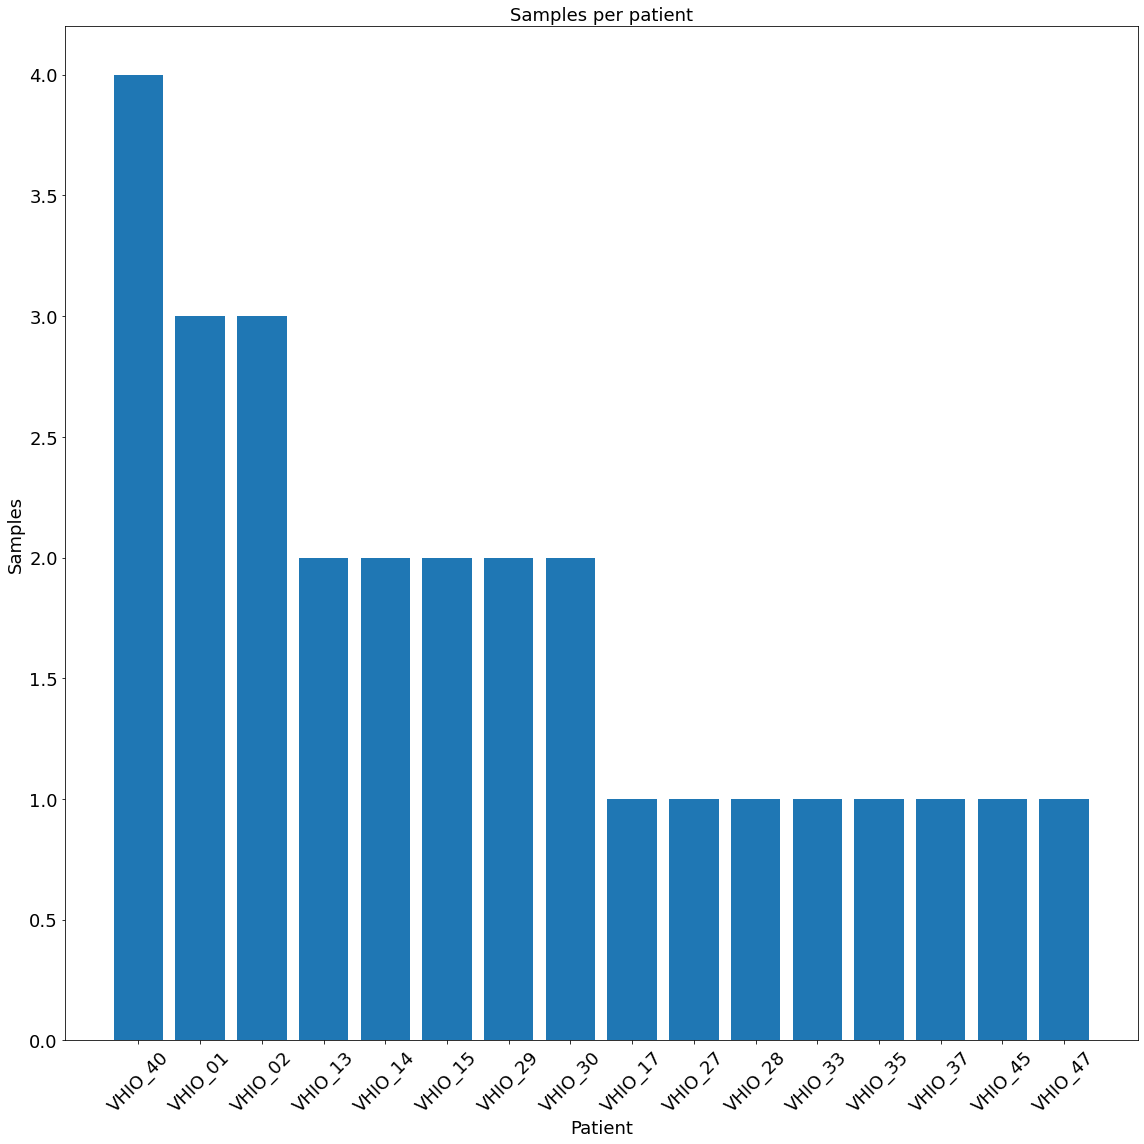

In [127]:
sub = meta_filtered.loc[:, ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('samples_per_patient.pdf', dpi=180)


<ipython-input-128-6996a8e4a6a7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


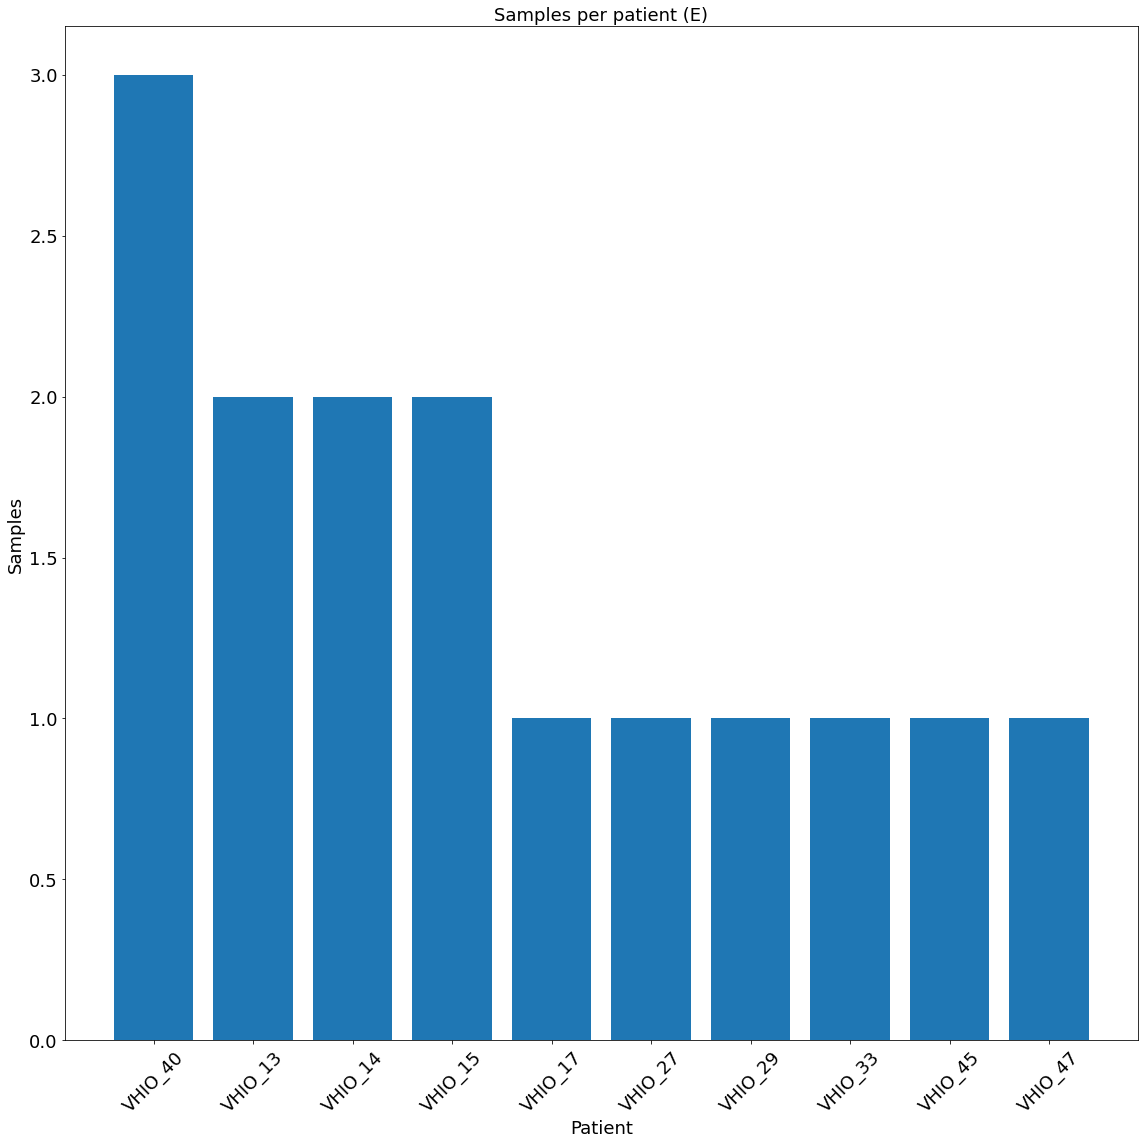

In [128]:
sub = meta_filtered.loc[meta_filtered['VAR2'] == 'E', ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient (E)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('samples_per_patient_E.pdf', dpi=180)

<ipython-input-129-0b15d3621ded>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


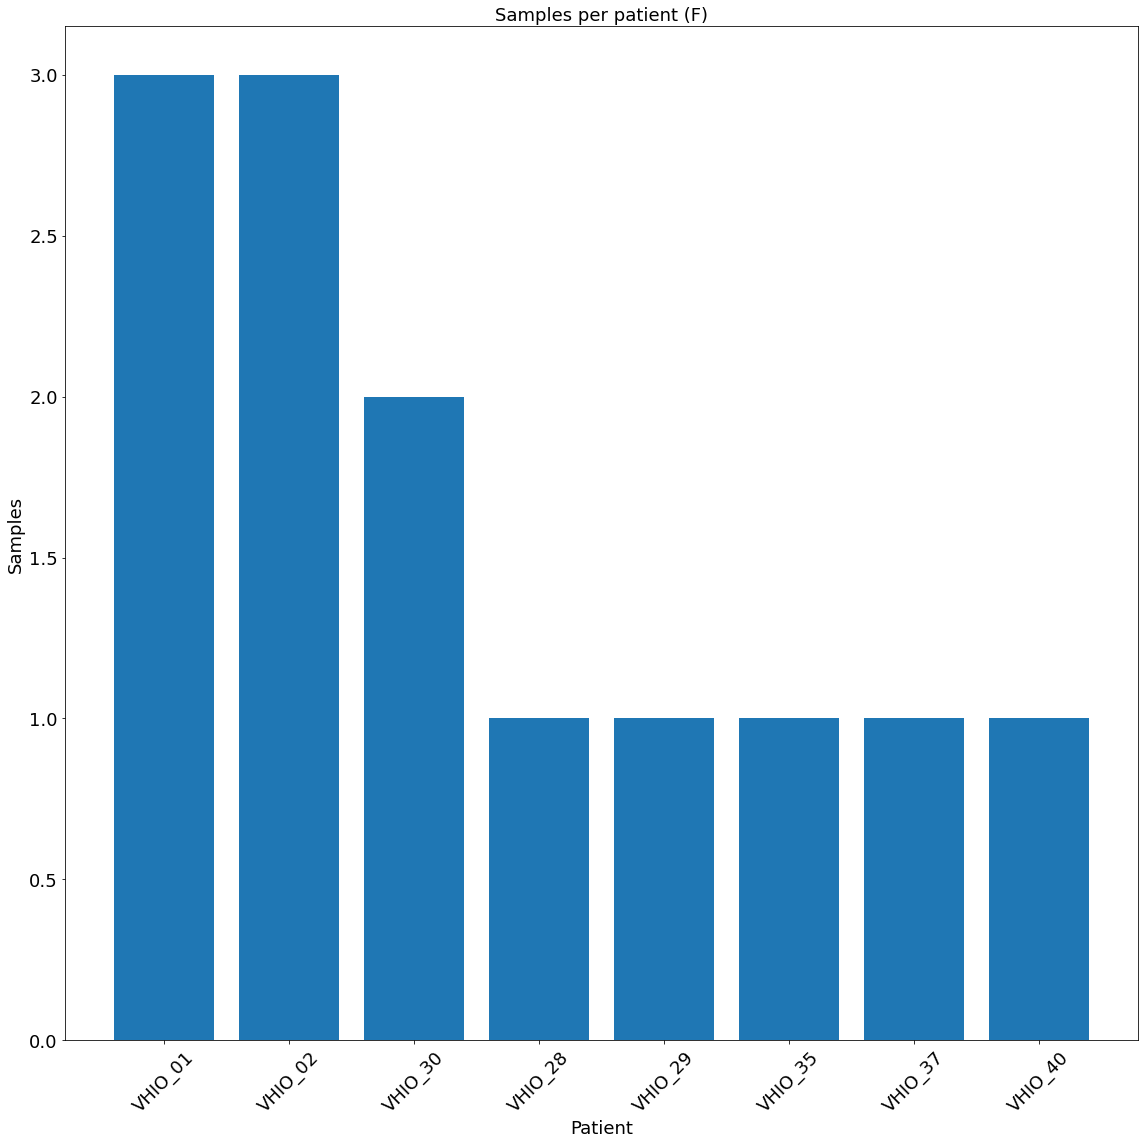

In [129]:
sub = meta_filtered.loc[meta_filtered['VAR2'] == 'F', ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient (F)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('samples_per_patient_F.pdf', dpi=180)

<ipython-input-130-2b639b811869>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-130-2b639b811869>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-130-2b639b811869>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


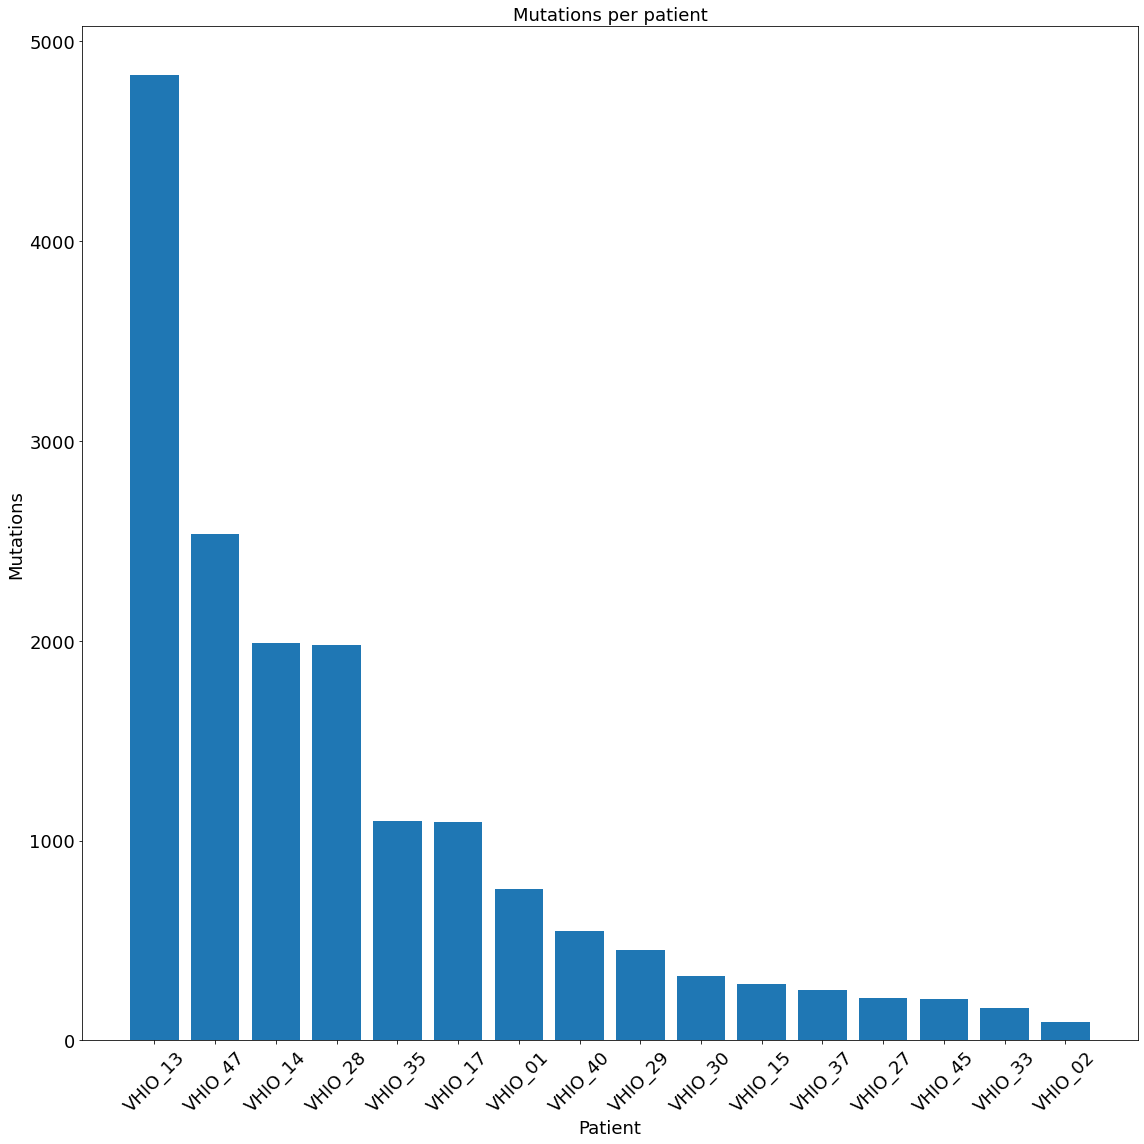

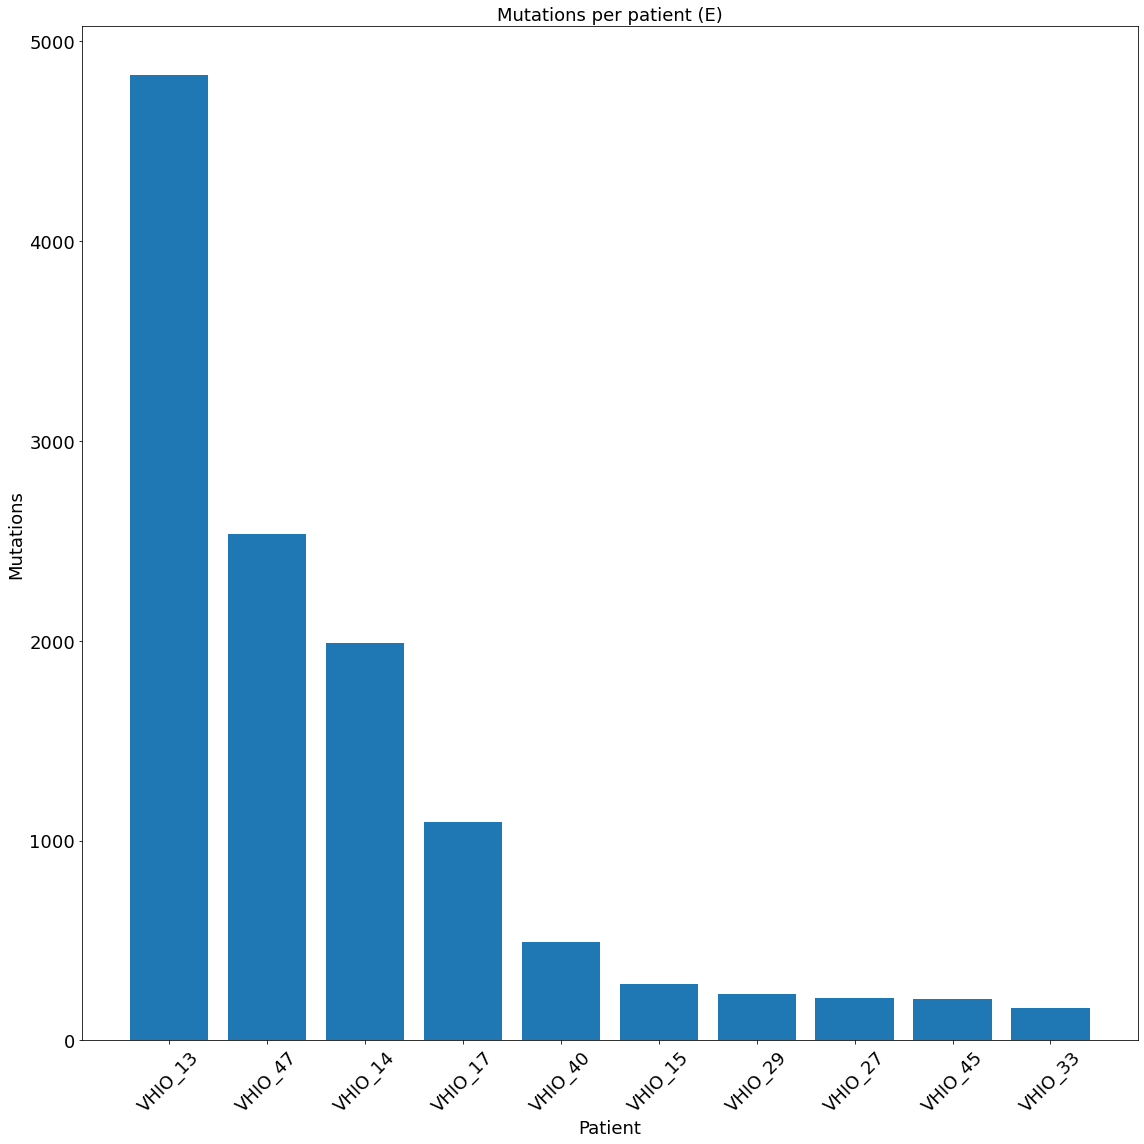

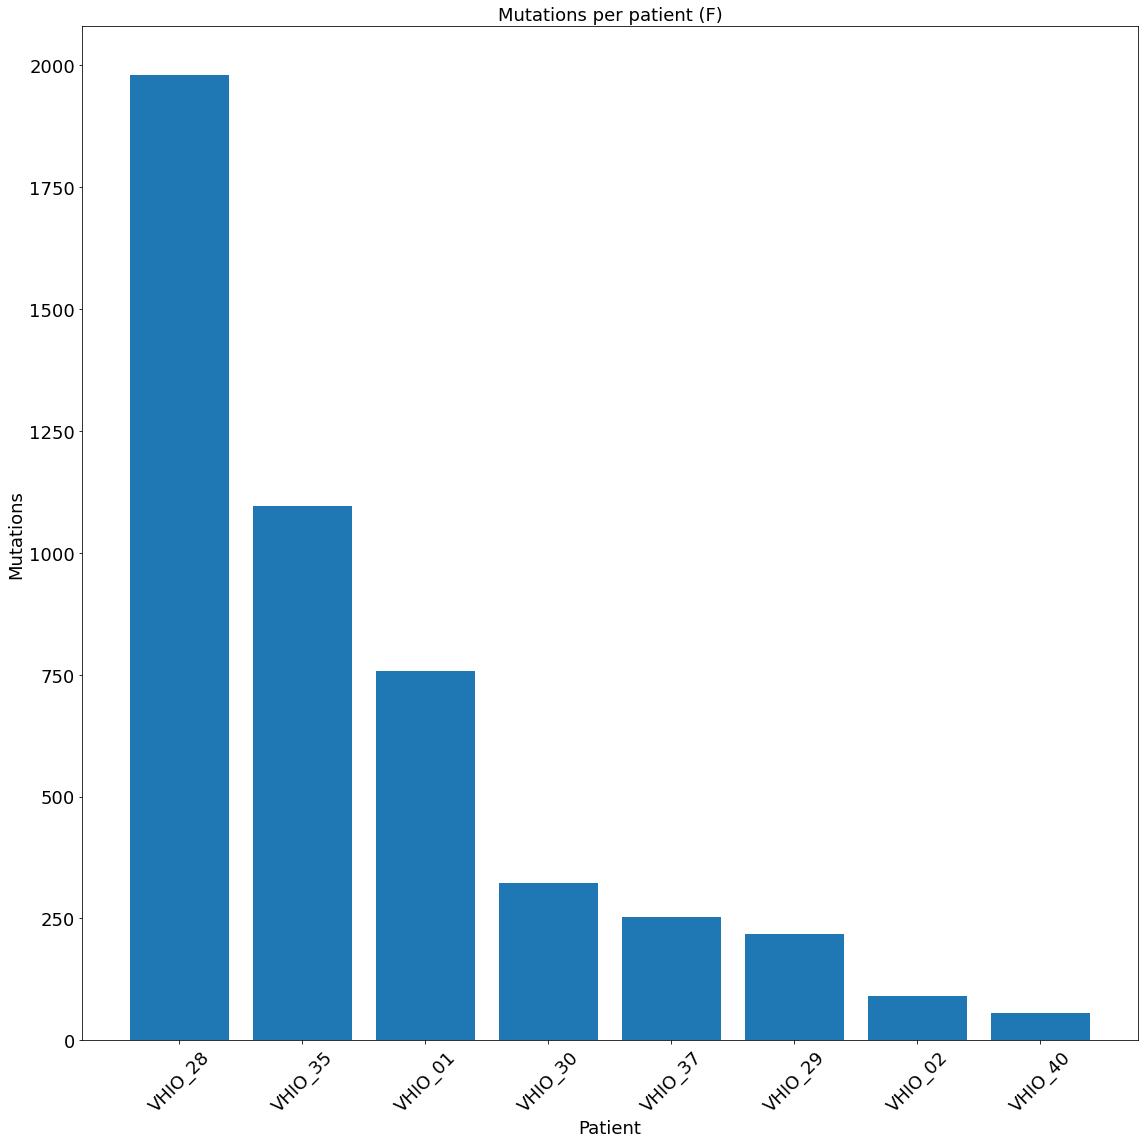

In [130]:
from collections import defaultdict

patients_mutations = defaultdict(int)
patients_mutations_E = defaultdict(int)
patients_mutations_F = defaultdict(int)

SAMPLES = meta_filtered.index.tolist()
for index,row in mutations.loc[:, mutations.columns[0:10].to_list() + SAMPLES].iterrows():
    for c,v in row[10:].items():
        if float(v) != 0:
            var2 = meta_filtered.loc[c, 'VAR2']
            patient = c.split('-')[-1]
            patients_mutations[patient] += 1
            if var2 == 'E':
                patients_mutations_E[patient] += 1
            else:
                patients_mutations_F[patient] += 1
    
fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations.keys(), 
                                         patients_mutations.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('mutations_per_patient.pdf', dpi=180)

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_E.keys(), 
                                         patients_mutations_E.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (E)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('mutations_per_patient_E.pdf', dpi=180)

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_F.keys(), 
                                         patients_mutations_F.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (F)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('mutations_per_patient_F.pdf', dpi=180)

<ipython-input-131-23da256405b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-131-23da256405b1>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-131-23da256405b1>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


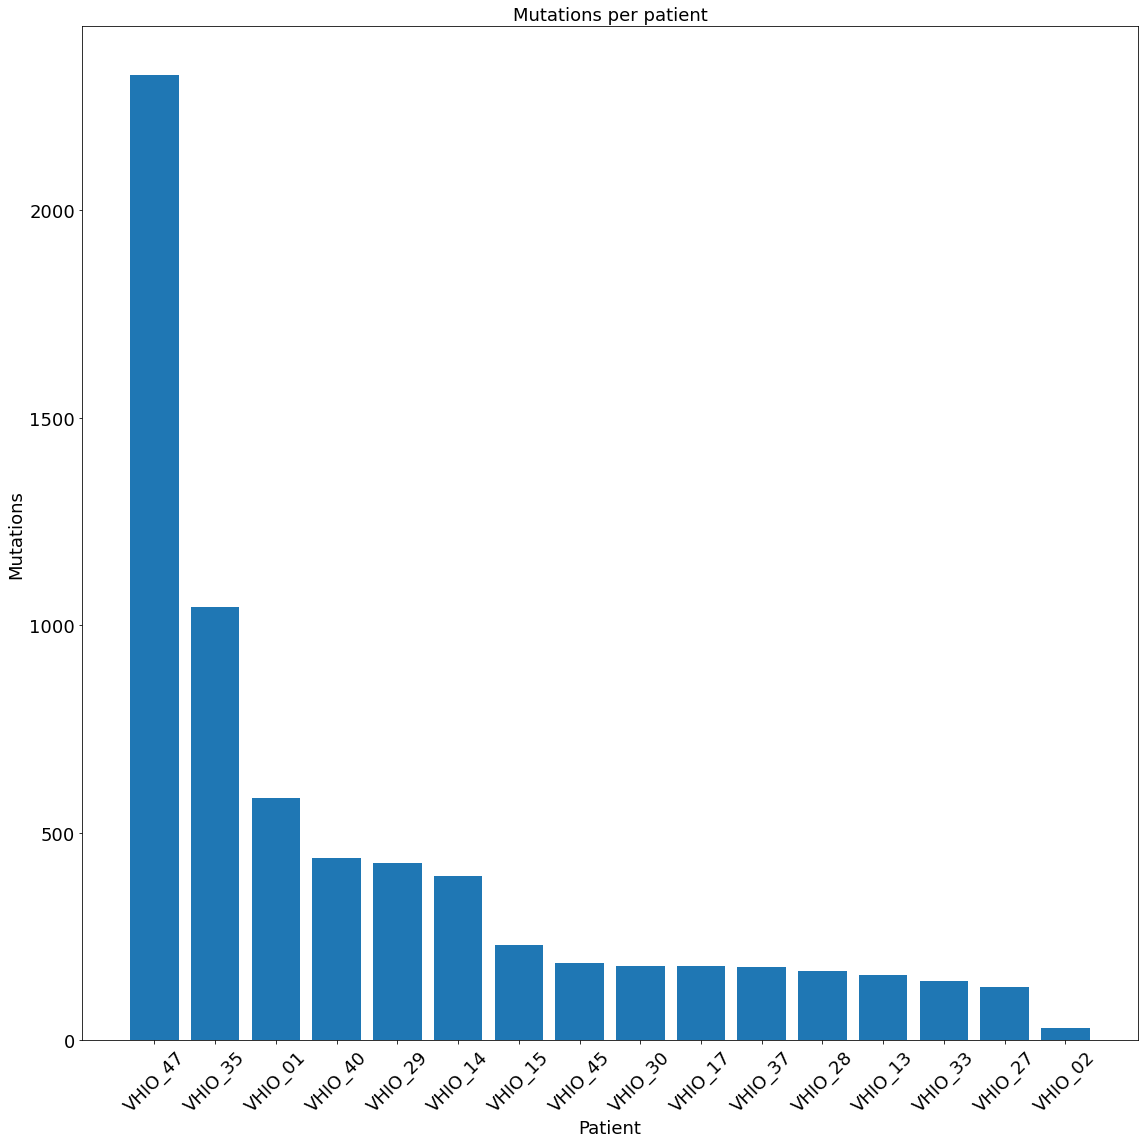

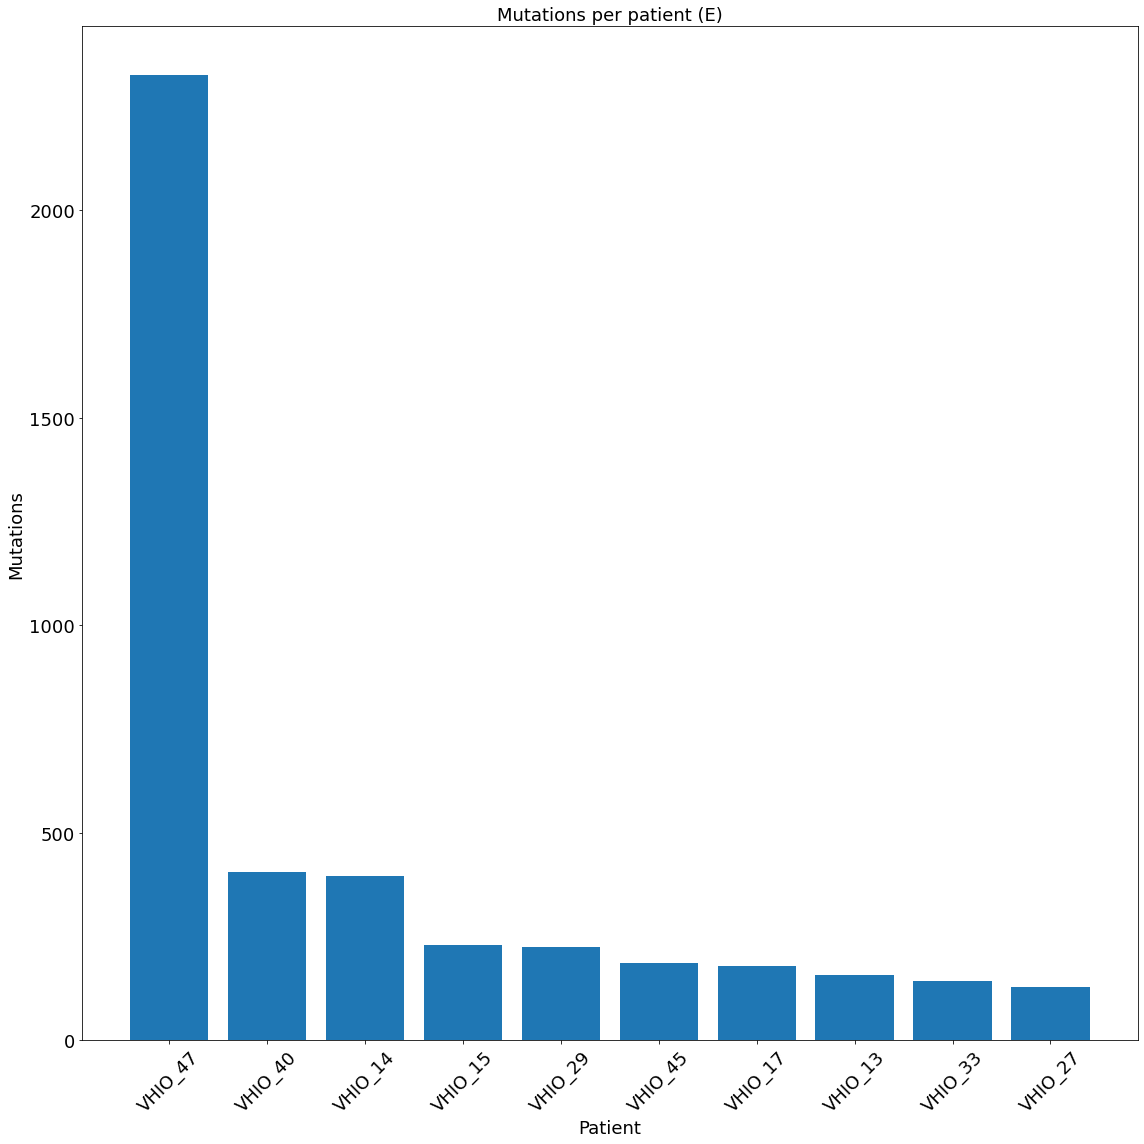

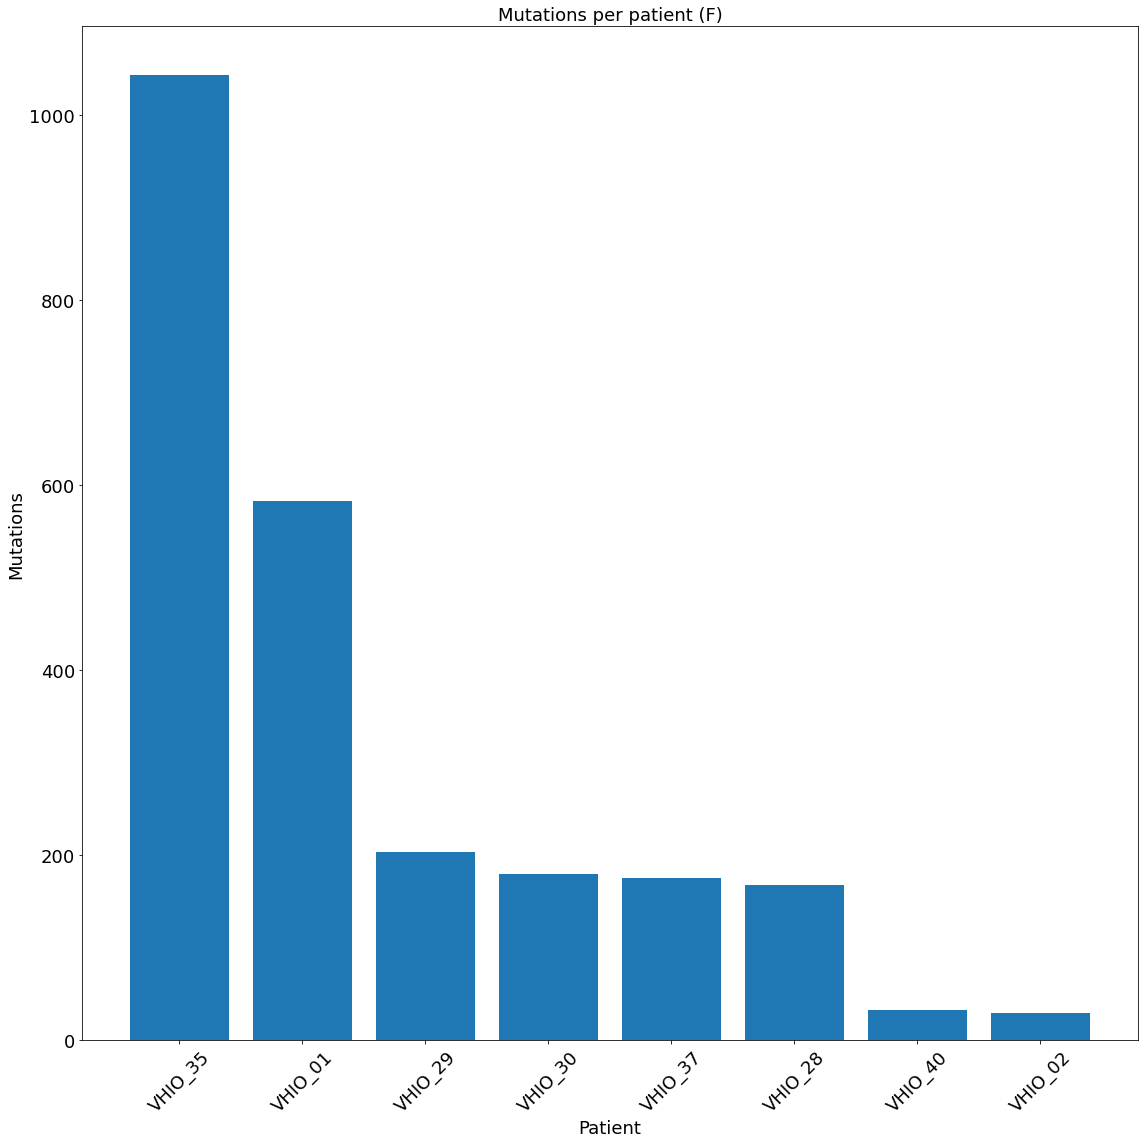

In [131]:
patients_mutations = defaultdict(int)
patients_mutations_E = defaultdict(int)
patients_mutations_F = defaultdict(int)

for index,row in mutations_filtered.iterrows():
    for c,v in row[10:].items():
        if float(v) >= 5:
            var2 = meta_filtered.loc[c, 'VAR2']
            patient = c.split('-')[-1]
            patients_mutations[patient] += 1
            if var2 == 'E':
                patients_mutations_E[patient] += 1
            else:
                patients_mutations_F[patient] += 1
    
fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations.keys(), 
                                         patients_mutations.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('mutations_per_patient_filtered.pdf', dpi=180)

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_E.keys(), 
                                         patients_mutations_E.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (E)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('mutations_per_patient_E_filtered.pdf', dpi=180)

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_F.keys(), 
                                         patients_mutations_F.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (F)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('mutations_per_patient_F_filtered.pdf', dpi=180)